In [ ]:
### Notebook to analyse semantic change around ethnic, religious, and caste categories in the selected GM
### ESSHC 2025

### Author: jiaqi.zhu@dh.huc.knaw.nl 

In [ ]:
### I use code from Nilo Pedrazzini in this notebook. 
### link: https://github.com/Living-with-machines/DiachronicEmb-BigHistData/blob/main/scripts/exploration/changepoint_detection.ipynb

### I. Reading the selected GM

In [1]:
# on cleaned letters, not full letters because they are not as cleaned as the selected ones
import spacy
import pandas as pd

df = pd.read_csv('/Users/zhujiaqi/trifecta/all_letters.tsv',sep='\t')

In [2]:
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610.0,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610.0,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610.0,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611.0,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612.0,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765.0,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766.0,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766.0,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766.0,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN


In [3]:
import numpy as np
# Drop rows with NaN or infinite values in the float column and convert to integer
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['year'])
df['year'] = df['year'].astype(int)

In [4]:
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN


### II. Linguistic pre-processing

In [5]:
# I import (modern) dutch dictionary from spacy
# is there any better way to do this since what we have is old dutch?
sp = spacy.load("nl_core_news_sm")

I split the letters into sentences, although this step may not be needed in the end. 

In [6]:
df['text'] = df['text'].astype(str)

df['text_spacy'] = [sp(df['text'].iloc[i]) for i in range(df.shape[0])]
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,..."


I lemmatise the letters. 

In [7]:
df['Lemmas'] = [[word.lemma_ for word in sp(df['text'].iloc[i])] for i in range(df.shape[0])]
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Lemmas
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckig, uitslag, de, in, 1762, onder..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,...","[ook, hebben, wij, bij, secreet, besluyt, van,..."


Stopwords exclusion and further filtering. 
I exclude non-alphabetical characters:

In [8]:
df["Lemmas_clean"] = ''
for i in range(df.shape[0]):
    df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
df

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_35674/610486668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_35674/610486668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_35674/610486668.py:3: SettingWithCopy

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Lemmas,Lemmas_clean
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u...","[«, scheepshericht, vnl., handelen, over, uitg..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, de, inhoud, van, deze, brief, zijn, evenmi..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t...","[principaelijck, besich, zijn, in, ’t, opbouwe..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ...","[mijn, advys, soud, Oock, sijn, dat, U, E, gee..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, het, twee, gezandschap, op, Colombo, a..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckig, uitslag, de, in, 1762, onder...","[Den, ongeluckig, uitslag, de, in, 1762, onder..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,...","[ook, hebben, wij, bij, secreet, besluyt, van,...","[ook, hebben, wij, bij, secreet, besluyt, van,..."


I exclude stop words, although they will be needed for word embedding training:

In [9]:
from nltk.corpus import stopwords
import nltk

#I manually added these stopwords from what i have seen from the VOC data. 
# I had a discussion with Esger a few months ago to know how they deal with the stopwoprds in old Dutch in Republic project and he said it seems to him a gopod solution 
old_stoplist = ['„','den','wij','t','ende','—','ten','wel','uijt','soo','de','van','en','in',
                                        'ten','uyt','ƒ','maer','daer','f',
            'dese', 'des','den', 'ter', 'aen', 'soude',
            'sullen', 'sal', 'haer', 'sij', 'hadde',
            'desen','ofte','se','sijn', 'onse',
            'sonder', 'soo', 'eenige', 'sijne',
            'oock', 'alsoo', 'naer', 'weder',
            'seer', 'ende', 'mede', 'dog', 'dogh',
            'konnen', 'off', 'connen', 'buyten',
            'daarvan', 'souden', 'nae', 'wesen',
            'waarvan', 'aldaer', 'tegens', 'dien','vande','alhier','welke','aldaar','alle','aande','deselve','noch',
               'lb', 'zullen', 'moeten', 'enen', 'd', 'ander','hadden', 'sijnde','zijnde', 'hebbende', 'daarmet', 'alleen'] 

stopwords = set(stopwords.words('dutch')+old_stoplist)
df["Lemmas_nostop"] = ''
for i in range(df.shape[0]):
    df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
df

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_35674/2440660643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_35674/2440660643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_35674/2440660643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Lemmas,Lemmas_clean,Lemmas_nostop
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u...","[«, scheepshericht, vnl., handelen, over, uitg...","[«, scheepshericht, ,, vnl., handelen, uitgede..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, reisbeschrijving, »]","[«, Journaelsgewijse, "", reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, inhoud, brief, evenmin, beide, vorig, alge..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t...","[principaelijck, besich, zijn, in, ’t, opbouwe...","[., ., ., principaelijck, besich, ’t, opbouwen..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ...","[mijn, advys, soud, Oock, sijn, dat, U, E, gee...","[advys, soud, Oock, ,, U, E, licht, vrouw, vad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[vermits, gouverneur, Fockens, apart, brief, v..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, twee, gezandschap, Colombo, aankomen, ..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckig, uitslag, de, in, 1762, onder...","[Den, ongeluckig, uitslag, de, in, 1762, onder...","[Den, ongeluckig, uitslag, 1762, ondernomeen, ..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 

## III. Semantic change with cosine similarity

### Step 1: Define eight time periods and split the corpus

In [28]:
# Define the min and max years from the dataframe
min_year = min(df['year'])
max_year = max(df['year'])

# Compute the split points to divide the range into eight equal parts
split_1 = min_year + (max_year - min_year) // 8
split_2 = min_year + 2 * (max_year - min_year) // 8
split_3 = min_year + 3 * (max_year - min_year) // 8
split_4 = min_year + 4 * (max_year - min_year) // 8
split_5 = min_year + 5 * (max_year - min_year) // 8
split_6 = min_year + 6 * (max_year - min_year) // 8
split_7 = min_year + 7 * (max_year - min_year) // 8

# Create eight time periods
time_period_1 = list(range(min_year, split_1 + 1))
time_period_2 = list(range(split_1 + 1, split_2 + 1))
time_period_3 = list(range(split_2 + 1, split_3 + 1))
time_period_4 = list(range(split_3 + 1, split_4 + 1))
time_period_5 = list(range(split_4 + 1, split_5 + 1))
time_period_6 = list(range(split_5 + 1, split_6 + 1))
time_period_7 = list(range(split_6 + 1, split_7 + 1))
time_period_8 = list(range(split_7 + 1, max_year + 1))

print(time_period_1, time_period_2, time_period_3, time_period_4, time_period_5, time_period_6, time_period_7, time_period_8)

[1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629] [1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649] [1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668] [1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688] [1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708] [1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727] [1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747] [1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767]


In [11]:
(df['year']).describe()

count     604.000000
mean     1692.763245
std        45.155804
min      1610.000000
25%      1655.000000
50%      1699.000000
75%      1732.000000
max      1767.000000
Name: year, dtype: float64

In [29]:
df1 = df[df['year'].isin(time_period_1)]
df2 = df[df['year'].isin(time_period_2)]
df3 = df[df['year'].isin(time_period_3)]
df4 = df[df['year'].isin(time_period_4)]
df5 = df[df['year'].isin(time_period_5)]
df6 = df[df['year'].isin(time_period_6)]
df7 = df[df['year'].isin(time_period_7)]
df8 = df[df['year'].isin(time_period_8)]

In [13]:
max(df1['year'])

1649

In [30]:
df.shape[0] == df1.shape[0] + df2.shape[0]+df3.shape[0] + df4.shape[0]+df5.shape[0] + df6.shape[0]+df7.shape[0] + df8.shape[0]

True

### Step 2. Train word embeddings for the two time periods

I train two word2vec models, one for each dataframe corresponding to a time period. I choose the parameters that led to the best model. This takes approximately 5 minutes. You can skip this cell.

In [31]:
import gensim

model1 = gensim.models.Word2Vec(df1['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model2 = gensim.models.Word2Vec(df2['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model3 = gensim.models.Word2Vec(df3['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model4 = gensim.models.Word2Vec(df4['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model5 = gensim.models.Word2Vec(df5['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model6 = gensim.models.Word2Vec(df6['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model7 = gensim.models.Word2Vec(df7['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model8 = gensim.models.Word2Vec(df8['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)

In [32]:
# Save the entire model (recommended for further training)
model1.save("word2vec_1610s.model")
model2.save("word2vec_1630s.model")
model3.save("word2vec_1650s.model")
model4.save("word2vec_1669s.model")
model5.save("word2vec_1689s.model")
model6.save("word2vec_1709s.model")
model7.save("word2vec_1728s.model")
model8.save("word2vec_1748s.model")

# Save only the word vectors (smaller size, faster loading for inference)
model1.wv.save("embeddings_1610s.kv")
model2.wv.save("embeddings_1630s.kv")
model3.wv.save("embeddings_1650s.kv")
model4.wv.save("embeddings_1669s.kv")
model5.wv.save("embeddings_1689s.kv")
model6.wv.save("embeddings_1709s.kv")
model7.wv.save("embeddings_1728s.kv")
model8.wv.save("embeddings_1748s.kv")

###  Step 3. Compare semantic change trajectory of individual words

'moor' not found in 1610s
'inboorling' not found in 1610s
'kling' not found in 1610s
'kling' not found in 1630s
'kling' not found in 1669s
'kling' not found in 1748s


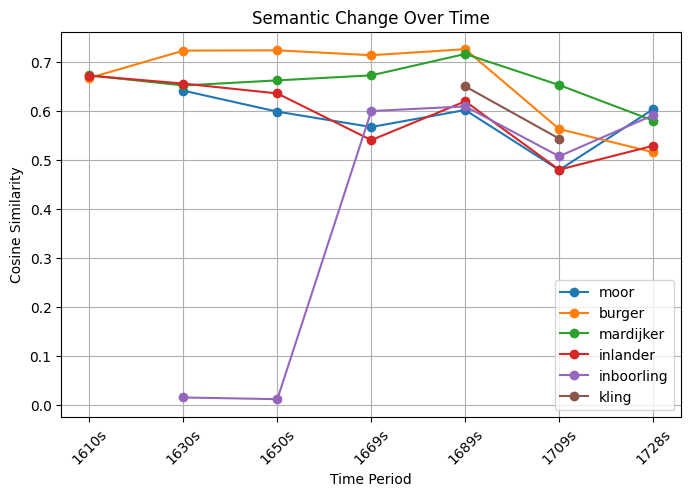

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Dictionary of trained Word2Vec models for different time periods
models = {
    "1610s": model1,
    "1630s": model2,
    "1650s": model3,
    "1669s": model4,
    "1689s": model5,
    "1709s": model6,
    "1728s": model7,
    "1748s": model8,
    # Add more if needed...
}

# Define multiple target words
target_words = ["moor", "burger", "mardijker","inlander","inboorling","kling"]  # Add more words as needed

# Store word vectors over time
word_vectors = {word: {} for word in target_words}

for time, model in models.items():
    for word in target_words:
        if word in model.wv.key_to_index:  
            word_vectors[word][time] = model.wv[word]  
        else:
            print(f"'{word}' not found in {time}")

# Compute cosine similarities for each word over time
time_labels = sorted(models.keys())  # Ensure chronological order
cosine_similarities = {word: [] for word in target_words}

for word in target_words:
    for i in range(len(time_labels) - 1):
        t1, t2 = time_labels[i], time_labels[i + 1]
        if t1 in word_vectors[word] and t2 in word_vectors[word]:
            cos_sim = cosine_similarity(
                [word_vectors[word][t1]], [word_vectors[word][t2]]
            )[0][0]
            cosine_similarities[word].append(cos_sim)
        else:
            cosine_similarities[word].append(None)  # Handle missing values

# Plot cosine similarity changes
plt.figure(figsize=(8, 5))

for word in target_words:
    cosine_similarities[word].append(None)  # Ensure 4 elements in y
    plt.plot(time_labels, cosine_similarities[word], marker="o", label=word)

plt.xlabel("Time Period")
plt.ylabel("Cosine Similarity")
plt.title("Semantic Change Over Time")
plt.xticks(rotation=45)  # Make labels readable
plt.legend()
plt.grid(True)
plt.show()